## Activation energy from NMR spectra
0. Imports

In [1]:
from kinetics.initial_rates import compInitialRate, compLeastSquaresRateLaw
from kinetics.json_definitions import readNMRIntegrationData

import os
import numpy
from matplotlib import pyplot as plt

1. Read the data from each NMR kinetic experiment JSON file.

In [2]:
path_to_kinetic_data = 'bromo_substrate/product/kinetic_json'

experiments = {}

# Iterate over the kinetic experiment directories.
for file_name in [f for f in os.listdir(path_to_kinetic_data) if not f.startswith('.')]:
    path_to_file = os.path.join(path_to_kinetic_data, file_name)
    
    # Read kinetic experiment data.
    kinetic_experiment = readNMRIntegrationData(path_to_file)
    
    # Record time points, integrals and temperature in the experiments dictionary
    experiment_id = kinetic_experiment["experiment_id"]
    experiments[experiment_id] = {
        "time_points": kinetic_experiment["time_points"],
        "integrals": kinetic_experiment["integrals"],
        "temperature": kinetic_experiment["temperature"]
    }

2. Compute the initial rates by estimating the initial rate of change in the integral value of the monitored component.

In [3]:
experiments.keys()

dict_keys(['neg20_data', 'neg50_data', 'neg30_data', 'neg40_data'])

The reaction percentage specified will probably lead to significant errors in the approximation of the initial rate. Please keep the value of reaction percentage below or at 10%


[[1.000e+00 1.430e+02]
 [1.000e+00 4.480e+02]
 [1.000e+00 6.270e+02]
 [1.000e+00 8.060e+02]
 [1.000e+00 9.850e+02]
 [1.000e+00 1.164e+03]
 [1.000e+00 1.343e+03]
 [1.000e+00 1.522e+03]]


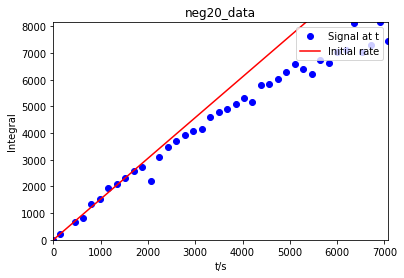

initial_rate =  1.5266752596401933 signal/s
The reaction percentage specified will probably lead to significant errors in the approximation of the initial rate. Please keep the value of reaction percentage below or at 10%


[[1.000e+00 1.790e+02]
 [1.000e+00 3.580e+02]
 [1.000e+00 5.380e+02]
 [1.000e+00 7.170e+02]
 [1.000e+00 8.970e+02]
 [1.000e+00 1.076e+03]
 [1.000e+00 1.255e+03]
 [1.000e+00 1.434e+03]
 [1.000e+00 1.613e+03]
 [1.000e+00 1.791e+03]
 [1.000e+00 1.970e+03]
 [1.000e+00 2.149e+03]
 [1.000e+00 2.328e+03]
 [1.000e+00 2.507e+03]
 [1.000e+00 2.686e+03]
 [1.000e+00 2.865e+03]
 [1.000e+00 3.043e+03]]


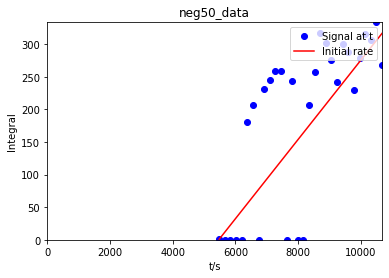

initial_rate =  0.060875427175519366 signal/s
The reaction percentage specified will probably lead to significant errors in the approximation of the initial rate. Please keep the value of reaction percentage below or at 10%


[[1.000e+00 1.790e+02]
 [1.000e+00 3.580e+02]
 [1.000e+00 5.370e+02]
 [1.000e+00 7.160e+02]
 [1.000e+00 8.940e+02]
 [1.000e+00 1.073e+03]]


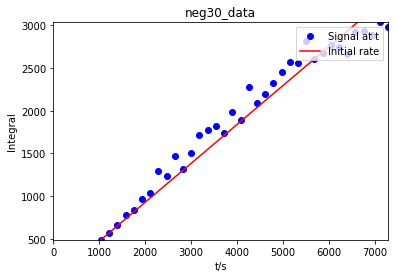

initial_rate =  0.4549191120641899 signal/s
The reaction percentage specified will probably lead to significant errors in the approximation of the initial rate. Please keep the value of reaction percentage below or at 10%


There are not enough measurements within the percent of the reaction specified and the best approximation available is the slope of the chord obtained from the first concentration measurement.




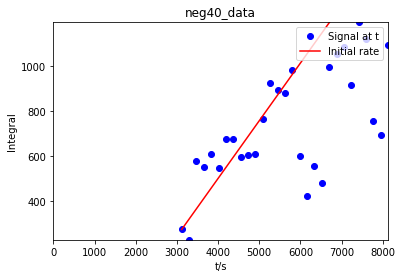

initial_rate =  0.25622777777777783 signal/s


In [4]:
# Add reaction information associated to each component ordered according to its position in the component id list.
component_ids = ['component_1']
component_is_reactant = [False]
stoichiometric_coefficients = [1.0]

# Set parameters used to compute the initial rate of change in concentration of each component in each experiment.
experiments['neg40_data']['initial_rate_parameters'] = {
    'component_1': {
        'time_range': slice(17,len(experiments['neg40_data']['time_points'])),
        'reaction_percentage': 100
    },
}

experiments['neg30_data']['initial_rate_parameters'] = {
    'component_1': {
        'time_range': slice(5,len(experiments['neg30_data']['time_points'])),
        'reaction_percentage': 30
    },
}

experiments['neg20_data']['initial_rate_parameters'] = {
    'component_1': {
        'time_range': slice(0,len(experiments['neg20_data']['time_points'])),
        'reaction_percentage': 30
    },
}
experiments['neg50_data']['initial_rate_parameters'] = {
    'component_1': {
        'time_range': slice(30,len(experiments['neg50_data']['time_points'])),
        'reaction_percentage': 80
    },
}    
#experiments['neg10_data']['initial_rate_parameters'] = {
 #   'component_1': {
  #      'time_range': slice(0,len(experiments['neg20_data']['time_points'])),
   #     'reaction_percentage': 30
    #},#
#}

experiment_ids = list(experiments.keys())
for experiment_id in experiment_ids:
    initial_rates = []
    for component_index, component_id in enumerate(component_ids):
        experiment = experiments[experiment_id]
        time_range = experiment['initial_rate_parameters'][component_id]['time_range']
        reaction_percentage = experiment['initial_rate_parameters'][component_id]['reaction_percentage']
        time_points_subset = experiment['time_points'][time_range]
        integrals_subset = experiment['integrals'][time_range]
        stoichiometric_coefficient = stoichiometric_coefficients[component_index]
        t = time_points_subset[:]
        time_points_subset = list(numpy.array(time_points_subset)-time_points_subset[0])

        initial_rate = compInitialRate(stoichiometric_coefficient, time_points_subset, integrals_subset, reaction_percentage)
        initial_rates.append(initial_rate)
        
        # Generate initial rate curve.
        is_reactant = component_is_reactant[component_index]
        initial_rate_curve = integrals_subset[0]  + numpy.multiply(
            (-1 if is_reactant else 1) * stoichiometric_coefficient * initial_rate,
            time_points_subset)

        # Plot kinetic data and the initial rate curve.
        plt.title(f"{experiment_id}") 
        plt.xlabel("t/s") 
        plt.ylabel(f"Integral") 
        plt.plot(t, integrals_subset, "-bo", linestyle='none', label = f"Signal at t")
        plt.plot(t, initial_rate_curve,  "-r", label = "Initial rate")
        plt.legend(loc = "upper right")
        plt.ylim(min(integrals_subset), max(integrals_subset))
        plt.xlim(0, t[-1])
        plt.show()
        print("initial_rate = ", initial_rate, "signal/s")
    experiments[experiment_id]['initial_rates'] = initial_rates

In [5]:
experiment['initial_rate_parameters'][component_id]['time_range']

slice(17, 46, None)

3. Compute the activation energy using linear regression.

In [6]:
t

[3118.0,
 3298.0,
 3477.0,
 3656.0,
 3835.0,
 4014.0,
 4193.0,
 4372.0,
 4551.0,
 4730.0,
 4909.0,
 5088.0,
 5267.0,
 5446.0,
 5624.0,
 5804.0,
 5983.0,
 6162.0,
 6341.0,
 6520.0,
 6699.0,
 6878.0,
 7057.0,
 7236.0,
 7415.0,
 7594.0,
 7773.0,
 7952.0,
 8131.0]

Ea: 11.506289960625763 kcal/mol


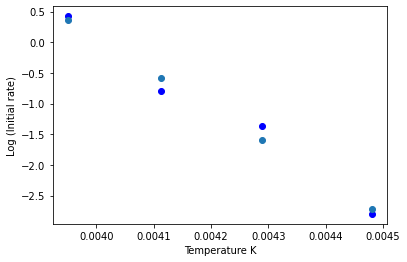

In [7]:
# R = 8.31446261815324 # J/(mol*K)
R = 1.98720425864083e-3 # kcal/(mol*K)
initial_rates = [
    experiments[experiment_id]['initial_rates'][0]
    for experiment_id in experiment_ids
]
temperatures = [
    experiments[experiment_id]['temperature']
    for experiment_id in experiment_ids
]
A = numpy.vstack((numpy.ones(len(temperatures)), numpy.reciprocal(numpy.multiply(-R,temperatures)).T)).T
b = numpy.log(initial_rates)
x = numpy.linalg.lstsq(A, b, rcond=None)[0]
Ea = x[1]
fit = [x[0]-Ea/(R*temperature) for temperature in temperatures]
print(f"Ea: {x[1]} kcal/mol")
plt.xlabel("Temperature K") 
plt.ylabel("Log (Initial rate)") 
plt.plot(numpy.reciprocal(temperatures), numpy.log(initial_rates), "-bo", linestyle='none')
plt.plot(numpy.reciprocal(temperatures), fit, "o")
plt.show()

In [8]:
from matplotlib import rcParams
rcParams['font.sans-serif'] = "arial"
rcParams.update({'font.size': 22})
rcParams['legend.loc'] = 'upper left'
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = numpy.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

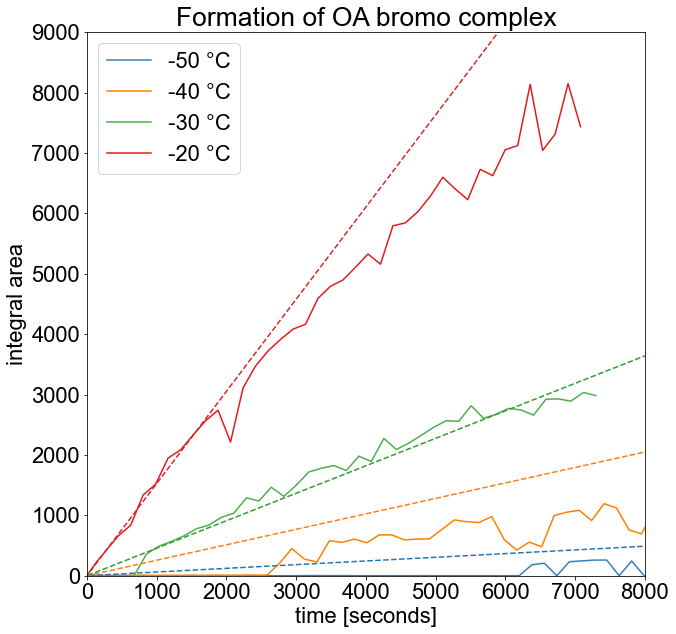

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.plot(experiments['neg50_data']['time_points'],experiments['neg50_data']['integrals'], label = '-50 \u00B0C', color = '#377eb8')
plt.plot(experiments['neg40_data']['time_points'],experiments['neg40_data']['integrals'], label = '-40 \u00B0C', color = '#ff7f00')
plt.plot(experiments['neg30_data']['time_points'],experiments['neg30_data']['integrals'], label = '-30 \u00B0C', color = '#4daf4a')
plt.plot(experiments['neg20_data']['time_points'],experiments['neg20_data']['integrals'], label = '-20 \u00B0C', color = '#e41a1c')
plt.legend()
plt.xlabel('time [seconds]')
plt.ylabel('integral area')
plt.title('Formation of OA bromo complex')
abline(0.061,0)
abline(0.256,0)
abline(0.455,0)
abline(1.526,0)
plt.xlim(0,8000)
plt.ylim(0,9000)
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/bromo_OA_formation_kinetics.svg')

In [10]:
initial_rates

[1.5266752596401933,
 0.060875427175519366,
 0.4549191120641899,
 0.25622777777777783]

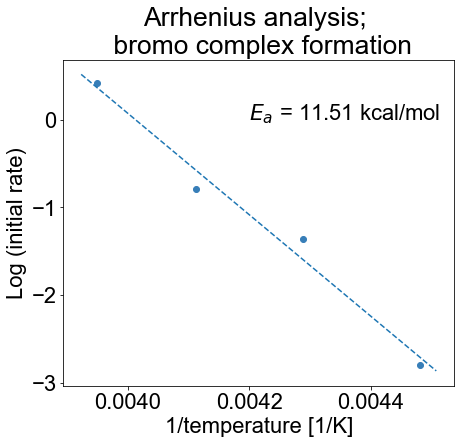

In [11]:
fig = plt.figure(figsize=(7, 6))
plt.plot(numpy.reciprocal(temperatures), numpy.log(initial_rates), marker = 'o', linestyle='none', color = '#377eb8')
plt.xlabel("1/temperature [1/K]") 
plt.ylabel("Log (initial rate)") 
plt.title('Arrhenius analysis; \n bromo complex formation')
plt.text(0.0042, 0,r'$E_a$ = 11.51 kcal/mol')
abline(-11.50628996/1.98720425864083e-3,23.23569645)
plt.savefig('/Users/zarko/Documents/zarkolab/projects/nickel_spiroindane/arrhenius_br_product.svg')